## Distribution of the exit times from a potential well

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import jax
import jax.numpy as jnp
from joblib import Parallel, delayed

In [2]:
# from basic_functions_gaussian import numerical_props, analytical_props, flatten
from Functions.basic_functions_gaussian import Group_points, sample_and_group
from Functions.basic_functions_bayesian import run_Metropolis, langevin_sampling

### Look at the Langevin dynamics for a quartic potential

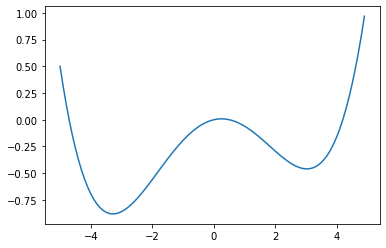

In [3]:
x = np.arange(-5, 5, 0.1)

quartic_potential = lambda x : 1/30*(0.2*x**4 - 4*x**2 + 2*x)

plt.plot(x, quartic_potential(x))

In [4]:
starting_point = 3.*np.ones(1)
n_steps = int(1e4)
seed = 1
kT = 1.

# my_energy_function_quartic = lambda x : jnp.sum(quartic_potential(x))

out_lang_1 = langevin_sampling(quartic_potential, starting_point, n_steps, seed=seed, kT=kT)


100%|██████████| 10000/10000 [01:40<00:00, 99.39it/s]


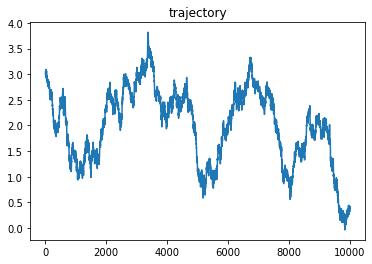

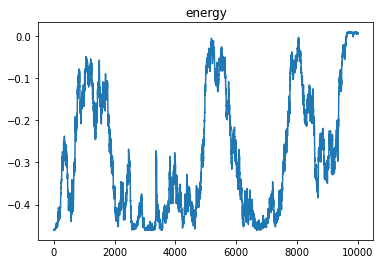

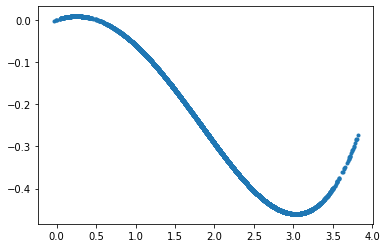

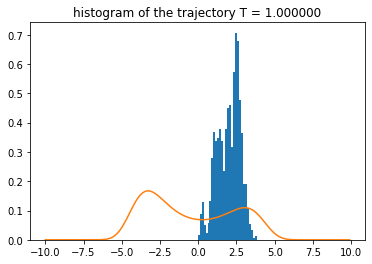

In [5]:
trajs = {}
trajs[1.] = out_lang_1[0]
# trajs[0.01] = np.array(out_lang_0p1[0])[:, 0]

plt.title('trajectory')
plt.plot(trajs[1.])
# plt.plot(trajs[0.01])

plt.figure()
plt.title('energy')
plt.plot(out_lang_1[1])
# plt.plot(out_lang_0p1[1])

plt.figure()
plt.plot(out_lang_1[0], out_lang_1[1], '.')


plt.figure()
plt.title('histogram of the trajectory T = %f' % kT)

plt.hist(trajs[1.], bins=30, density=True)

def prob_fun(dx = 0.1, kT = 1.):
    x = np.arange(-10, 10, dx)
    prob = np.exp(-quartic_potential(x)/kT)
    prob = prob/np.sum(prob*dx)  # probability density
    return x, prob

x, prob = prob_fun(kT=kT)
plt.plot(x, prob)

# plt.figure()
# plt.title('histogram T = 0.01')

# x, prob = prob_fun(kT=0.01)
# plt.plot(x, prob)

# plt.plot(np.exp(-quartic_potential(x)/0.01))
# plt.hist(trajs[0.01], bins=50, density=True)


#### Analysis of the results on cluster

In [14]:
path = '../quartic/'
dir_list = os.listdir(path)
id_list = np.unique(np.array([item[:19] for item in dir_list]))

s = id_list[0]

traj = np.load(path + s + 'traj.npy')
kT = 1.


In [20]:


eval(fun_string)

array([ 5.26666667e+01,  5.03117340e+01,  4.80325440e+01,  4.58275207e+01,
        4.36951040e+01,  4.16337500e+01,  3.96419307e+01,  3.77181340e+01,
        3.58608640e+01,  3.40686407e+01,  3.23400000e+01,  3.06734940e+01,
        2.90676907e+01,  2.75211740e+01,  2.60325440e+01,  2.46004167e+01,
        2.32234240e+01,  2.19002140e+01,  2.06294507e+01,  1.94098140e+01,
        1.82400000e+01,  1.71187207e+01,  1.60447040e+01,  1.50166940e+01,
        1.40334507e+01,  1.30937500e+01,  1.21963840e+01,  1.13401607e+01,
        1.05239040e+01,  9.74645400e+00,  9.00666667e+00,  8.30341400e+00,
        7.63558400e+00,  7.00208067e+00,  6.40182400e+00,  5.83375000e+00,
        5.29681067e+00,  4.78997400e+00,  4.31222400e+00,  3.86256067e+00,
        3.44000000e+00,  3.04357400e+00,  2.67233067e+00,  2.32533400e+00,
        2.00166400e+00,  1.70041667e+00,  1.42070400e+00,  1.16165400e+00,
        9.22410667e-01,  7.02134000e-01,  5.00000000e-01,  3.15200667e-01,
        1.46944000e-01, -

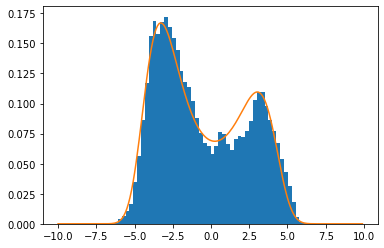

In [21]:
fun_string = '1/30*(0.2*x**4 - 4*x**2 + 2*x)'
quartic_potential = lambda x : eval(fun_string)

def prob_fun(dx = 0.1, kT = 1.):
    x = np.arange(-10, 10, dx)
    prob = np.exp(-quartic_potential(x)/kT)
    prob = prob/np.sum(prob*dx)  # probability density
    return x, prob

x, prob = prob_fun(kT=kT)


plt.hist(traj, bins=50, density=True)
plt.plot(x, prob)


### Look at the distribution of the exit times for a very simple energy landscape

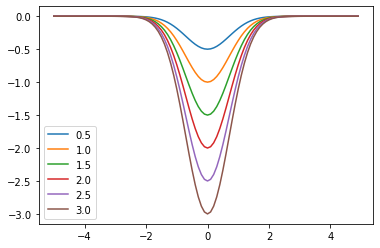

In [3]:
x = np.arange(-5, 5, 0.1)

depth_list = np.arange(0.5, 3.5, 0.5)

for depth in depth_list:
    my_energy_function_simple = lambda x : -depth*np.exp(-x**2)
    plt.plot(x, my_energy_function_simple(x), label=depth)

plt.legend()

In [ ]:
pars_dict = {'depth': depth, 'seed': seed, 'energy_fun': energy_fun_str}

sampling_pars = {'n_steps': int(1e4), 'starting_point': np.ones(1),
    'which_sampling': 'Langevin'}
    # 'which_sampling': 'Metropolis', 'dx': 0.05}

group_pars = {'if_diff': False, 'threshold': 50, 'value': 0.}
# group_pars = {'threshold': 200}



In [4]:
# depth_list = np.arange(0.5, 3, 0.5)
depth_list = [0.001]  # , 3.]

n_seeds = 10
random_states = np.arange(n_seeds)

sampling_pars = {'n_steps': int(1e4), 'starting_point': np.ones(1),
    'which_sampling': 'Langevin'}
    # 'which_sampling': 'Metropolis', 'dx': 0.05}

group_pars = {'if_diff': False, 'threshold': 50, 'value': 0.}
# group_pars = {'threshold': 200}

results = {}

for depth in depth_list:
    print('depth: ', depth)
    my_energy_function_simple = lambda x : -depth*jnp.exp(-x**2)
    
    tolerance = 2e-2*depth  # for Group_points function

    # in series
    # results[depth] = []
    # for seed in random_states:
    #     results[depth].append(sample_and_group(my_energy_function_simple, **sampling_pars, seed=seed, **group_pars, tolerance=tolerance))

    # parallelize:
    results[depth] = Parallel(n_jobs=10)(delayed(sample_and_group)(my_energy_function_simple, **sampling_pars, seed=seed, **group_pars, tolerance=tolerance) for seed in random_states)


depth:  0.001


 32%|███▏      | 3234/10000 [01:17<01:45, 64.28it/s]

KeyboardInterrupt: 

In [22]:
np.array(results[depth][seed][1].whs_flat)

array([ 7199,  7200,  7201, ...,  9998,  9999, 10000])

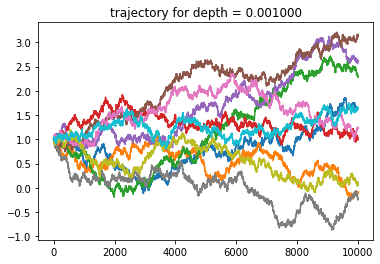

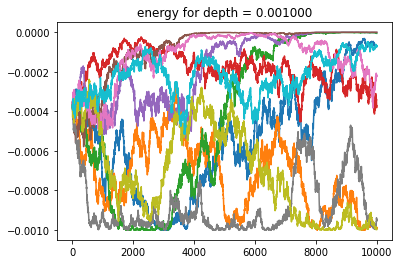

In [11]:
for depth in depth_list:
    
    plt.figure()
    plt.title('trajectory for depth = %f' % depth)

    for seed in random_states:
        traj = np.array(results[depth][seed][0][0])
        plt.plot(traj)
    
    plt.figure()
    plt.title('energy for depth = %f' % depth)

    for seed in random_states:
        traj = np.array(results[depth][seed][0][1])
        plt.plot(traj)



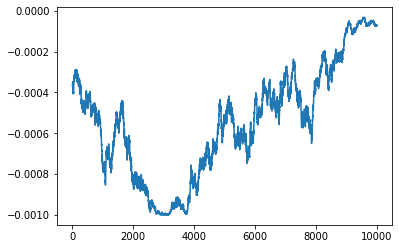

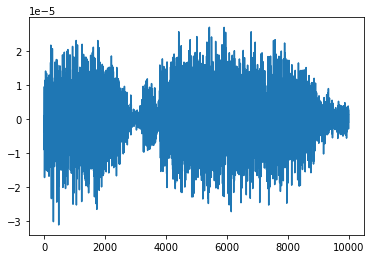

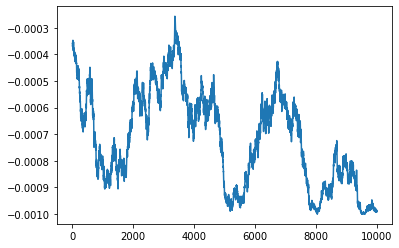

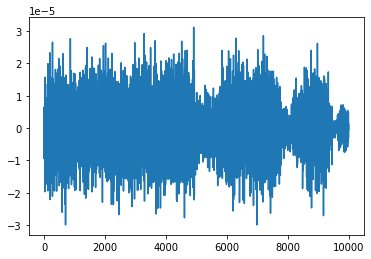

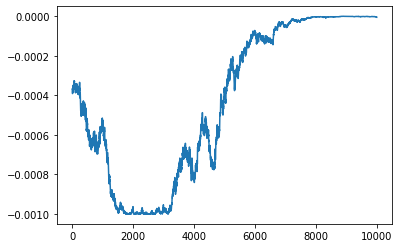

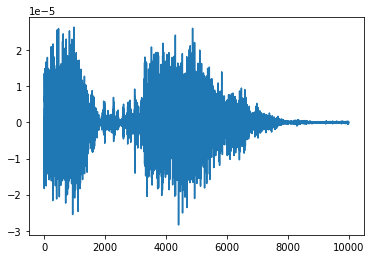

In [46]:
for seed in random_states[:3]:

    ene = results[depth][seed][0][1]
    
    plt.figure()
    plt.plot(ene)

    plt.figure()
    plt.plot(np.ediff1d(ene))

[]
[]
[7199 7514 7600]
[]
[6104 7231 7326]
[3668]
[3934 4109 4755 4839 5076 5488 6180 6374]
[]
[]
[]
[nan, nan, 7199, nan, 6104, 3668, 3934, nan, nan, nan]


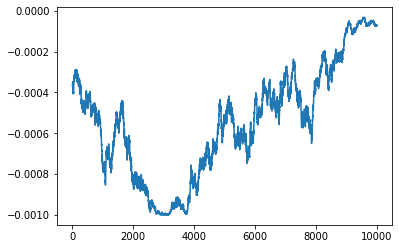

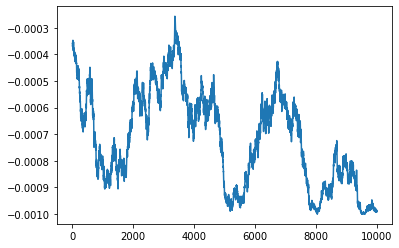

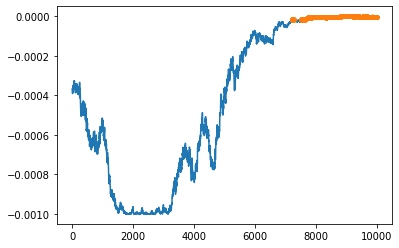

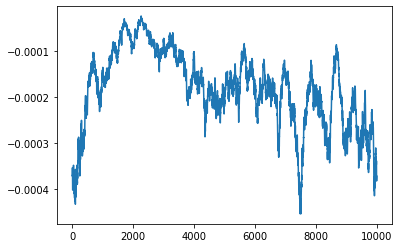

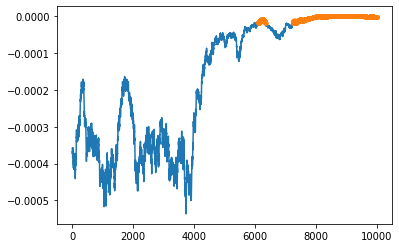

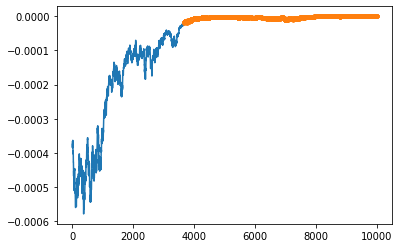

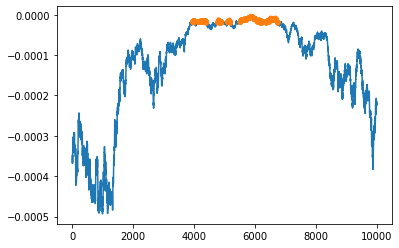

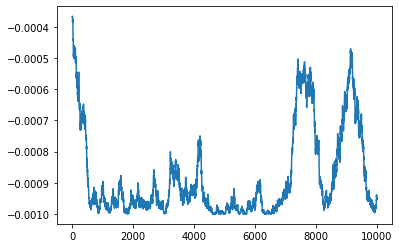

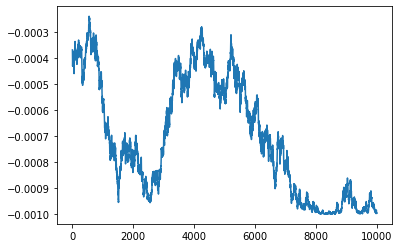

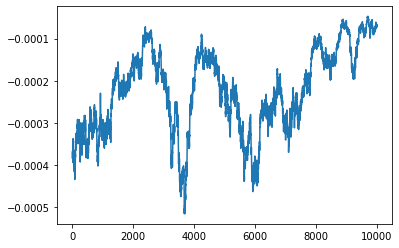

In [12]:
first_times = []

for seed in random_states:

    ene = np.array(results[depth][seed][0][1])
    gp = results[depth][seed][1]

    plt.figure()
    plt.plot(ene)
    if len(gp.whs_flat) != 0:
        plt.plot(gp.whs_flat, ene[gp.whs_flat], '.')
    
    print(gp.whs_first)

    if not (len(gp.whs_first) == 0):
        first_times.append(gp.whs_first[0])
    else:
        first_times.append(np.nan)

print(first_times)

In [49]:
mean = np.nanmean(first_times)
how_many = np.count_nonzero(~np.isnan(first_times))

print(depth, mean, how_many)

0.001 5226.25 4


In [ ]:
mean = np.nanmean(first_times)
how_many = np.count_nonzero(~np.isnan(first_times))

print(depth, mean, how_many)

0.01 5306.25 4


In [ ]:
mean = np.nanmean(first_times)
how_many = np.count_nonzero(~np.isnan(first_times))

print(depth, mean, how_many)

0.1 6248.75 4


In [ ]:
np.nanmean(first_times)

2933.777777777778

In [ ]:
np.mean(first_times)

1855.1

[]
[]
[7575]
[]
[6104 7228]
[3659]
[4169 4839 5347 6340]
[]
[]
[]
[None, None, 7575, None, 6104, 3659, 4169, None, None, None]


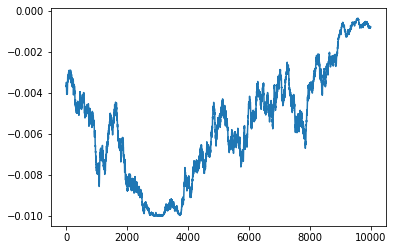

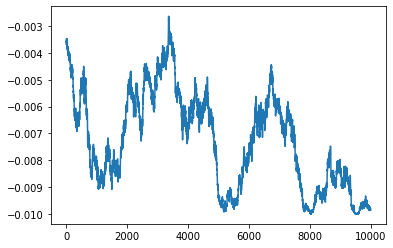

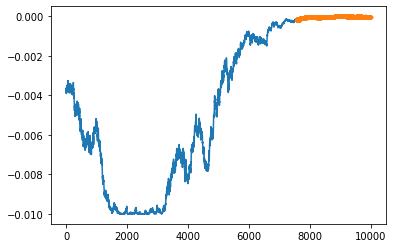

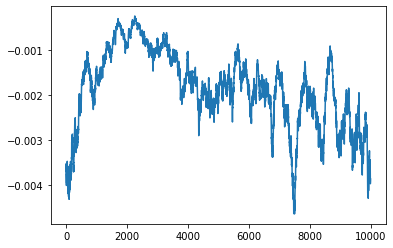

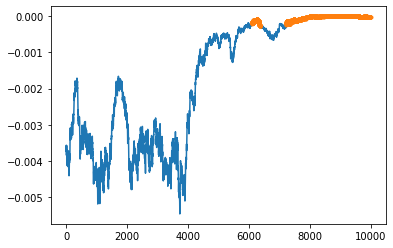

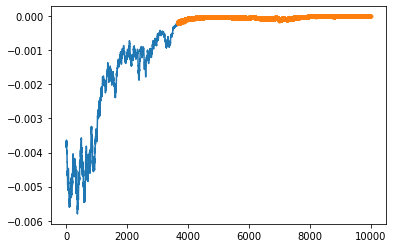

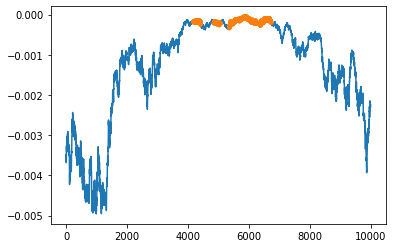

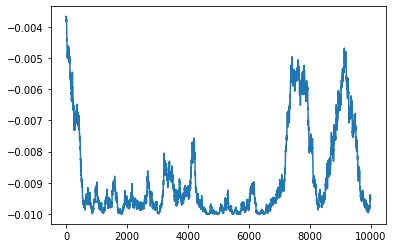

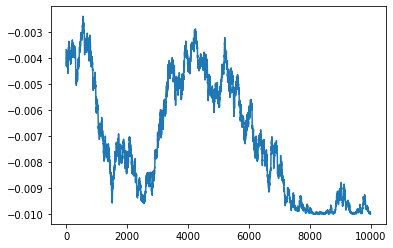

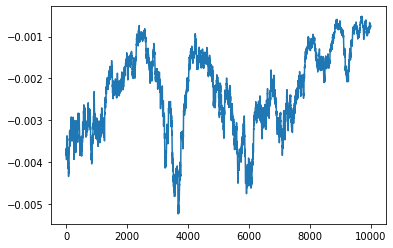

In [ ]:
first_times = []

for seed in random_states:

    ene = np.array(results[depth][seed][0][1])
    gp = results[depth][seed][1]

    plt.figure()
    plt.plot(ene)
    if len(gp.whs_flat) != 0:
        plt.plot(gp.whs_flat, ene[gp.whs_flat], '.')

    
    print(gp.whs_first)

    if not (gp.whs_first.size == 0):
        first_times.append(gp.whs_first[0])
    else:
        first_times.append(None)

print(first_times)

[3382 4252 4421]
[]
[ 280 1301 1722 2209]
[2786 3481]
[4668]
[3807]
[]
[2435 2628 3536 3631]
[3510]
[4395 4492]
[3382, None, 280, 2786, 4668, 3807, None, 2435, 3510, 4395]


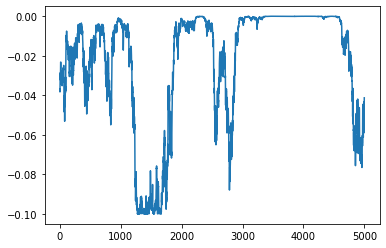

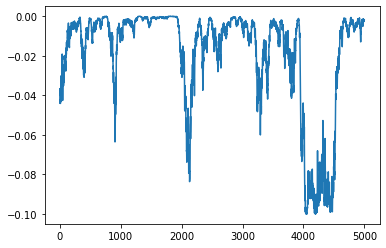

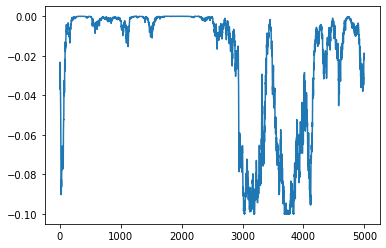

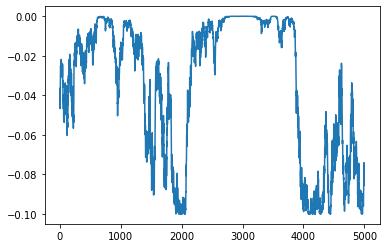

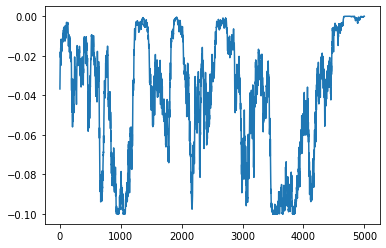

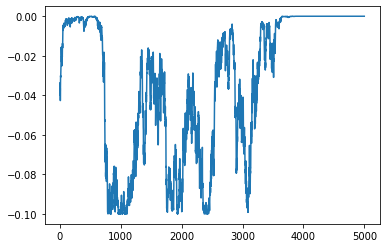

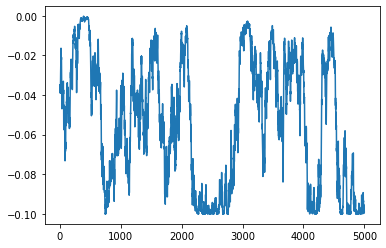

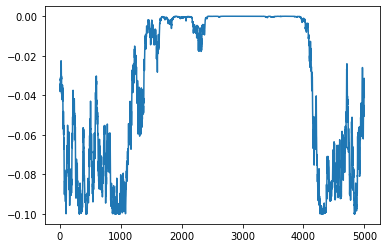

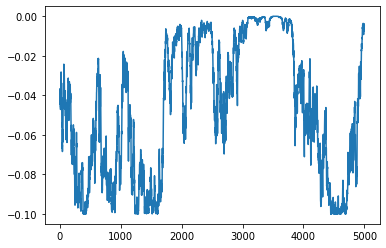

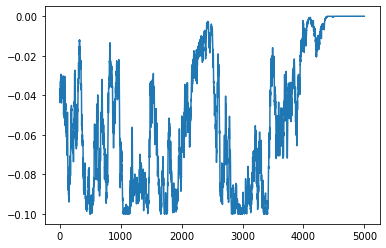

In [ ]:
first_times = []

for seed in random_states:

    ene = results[depth][seed][0][1]
    plt.figure()
    plt.plot(ene)

    gp = results[depth][seed][1]
    print(gp.whs_first)

    if not (gp.whs_first.size == 0):
        first_times.append(gp.whs_first[0])
    else:
        first_times.append(None)

print(first_times)

In [ ]:
depth = 0.1

[results[depth][i][1].whs_first[0] for i in range(len(results[depth]))]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[2.03, 35.2, 94.19, 218.25, 344.1]


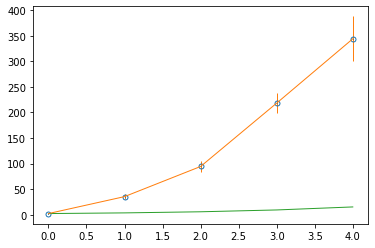

In [ ]:
mean = []
std_mean = []

for k in results.keys():
    first_frame = [results[k][i][1].whs_first[0] for i in range(len(results[k]))]
    mean.append(np.mean(first_frame))
    std_mean.append(np.std(first_frame)/np.sqrt(len(first_frame)))

print(mean)

plt.rcParams['lines.markeredgewidth'] = 5
plt.plot(mean, '.')
plt.errorbar(np.arange(len(mean)), mean, std_mean)

depth_list = np.array(depth_list)
plt.plot(mean[0]*np.exp(depth_list - depth_list[0]))


In [ ]:
print(dx, mean, std_mean)

0.1 [2.03, 35.2, 94.19, 218.25, 344.1] [0.7012068168522035, 5.051692785591777, 9.829879907709962, 19.481475175150365, 44.20383354416221]


#### Analysis of calculations on cluster

In [24]:
path = '../exit_times/'
dir_list = os.listdir(path)

s = dir_list[0]

ene = np.load(path + s + '/ene.npy')
traj = np.load(path + s + '/traj.npy')

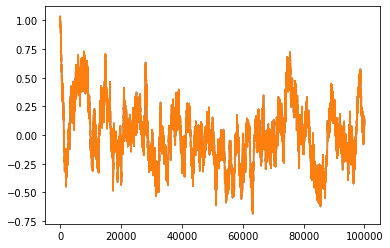

In [27]:
plt.plot(traj)
plt.plot(ene)